In [28]:
# Importing the basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.interpolate import BSpline

In [6]:
# Importing dataset

df = pd.read_csv('D:/Study/DataScience/RandomForest/bill_authentication.csv')

df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# Divide the data into attirbutes and labels

x = df.iloc[:, 0:4].values

y= df.iloc[:,4].values

In [8]:
# Split the data into training and testing datasets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [9]:
# Perform feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [10]:
# Training the RF model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)

rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [11]:
y_predict = rf.predict(x_test)

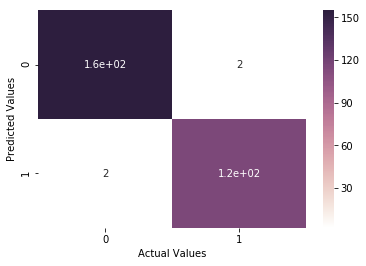

In [12]:
# Create confusion matrix

from sklearn.metrics import confusion_matrix

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cm = pd.DataFrame(confusion_matrix(y_test,y_predict))

sns.heatmap(cm, annot= True, cmap= cmap)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=123456)

rf.fit(x_train, y_train)

print(rf.oob_score_)

0.9936189608021878


In [71]:
oob_sc = []
trees =[]
rcf = RandomForestClassifier()
rcf.set_params(warm_start=True, oob_score=True)

#rcf = RandomForestClassifier(n_estimators=20, oob_score=True, random_state=123456)
for i in range(50,1001):
    rcf.set_params(n_estimators=i)
    #rcf = RandomForestClassifier(n_estimators=i, oob_score=True, random_state=123456, warm_start= True)
    rcf.fit(x_train, y_train)
    oob_score = rcf.oob_score_
    oob_error = 1 - rcf.oob_score_
    oob_sc.append(oob_error)
    trees.append(i)

In [73]:
len(trees)

951

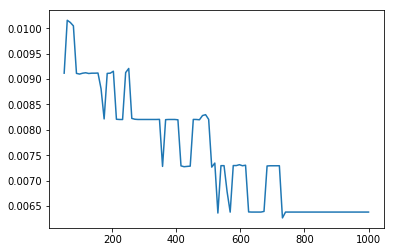

In [76]:
x = np.asarray(trees)

y = np.asarray(oob_sc)


from scipy.interpolate import make_interp_spline, BSpline

xnew = np.linspace(min(x),max(x),100) #300 represents number of points to make between T.min and T.max

spl = make_interp_spline(x, y, k=7) #BSpline object
ynew = spl(xnew)

plt.plot(xnew,ynew)
plt.show()